In [1]:
from hestonpy.models.heston import Heston

import matplotlib.pyplot as plt 
import time
import numpy as np

# Initialisation of the model

In [2]:
S0 = 100
V0 = 0.06
r = 0.05

params = {
    "kappa": 1,
    "theta": 0.06,
    "drift_emm": 0.01,
    "sigma": 0.3,
    "rho": -0.5,
}

heston = Heston(spot=S0, vol_initial=V0, r=r, **params)

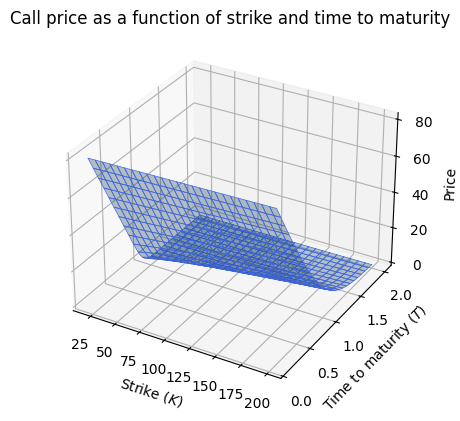

In [3]:
heston.price_surface()

### Price via Monte Carlo

Parameters

In [4]:
nbr_points = 100
nbr_simulations = 10**3

Via Euler-Maruyama scheme

In [5]:
start_time = time.time()
result = heston.monte_carlo_price(nbr_points=nbr_points, nbr_simulations=nbr_simulations, strike=100, time_to_maturity=1, scheme="euler")
time_delta = round(time.time() - start_time,4)
price_euler = round(result.price, 2)
std_euler = round(result.std, 2)
infinum_euler = round(result.infinum, 2)
supremum_euler = round(result.supremum, 2)
print(f"Monte Carlo Euler scheme in {time_delta}s : price ${price_euler}, std {std_euler}, and Confidence interval [{infinum_euler},{supremum_euler}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Euler scheme in 0.0452s : price $12.05, std 0.49, and Confidence interval [12.01,12.09]



Via Milstein scheme

In [6]:
start_time = time.time()
result = heston.monte_carlo_price(nbr_points=nbr_points, nbr_simulations=nbr_simulations, strike=100, time_to_maturity=1, scheme="milstein")
time_delta = round(time.time() - start_time,4)
price_milstein = round(result.price, 2)
std_milstein = round(result.std, 2)
infinum_milstein = round(result.infinum, 2)
supremum_milstein = round(result.supremum, 2)
print(f"Monte Carlo Milstein scheme in {time_delta}s : price ${price_milstein}, std {std_milstein}, and Confidence interval [{infinum_milstein},{supremum_milstein}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Milstein scheme in 0.0415s : price $12.02, std 0.49, and Confidence interval [11.97,12.06]



### Price via Fourier Transform

In [7]:
start_time = time.time()
price_FT, error_FT = heston.fourier_transform_price(strike=100, time_to_maturity=1, error_boolean=True)
time_delta = round(time.time() - start_time,4)
infinum = round(price_FT-error_FT, 3)
supremum = round(price_FT+error_FT, 3)
price_FT = round(price_FT, 3)
error_FT = round(error_FT, 8)
print(f"Fourier Transform in {time_delta}s : price ${price_FT}, error ${error_FT} , and Confidence interval [{infinum},{supremum}]\n")

Fourier Transform in 0.1629s : price $11.936, error $0.0 , and Confidence interval [11.936,11.936]



### Price via Carr-Madan formula 

In [8]:
start_time = time.time()
price_CM, error_CM = heston.carr_madan_price(strike=100, time_to_maturity=1, error_boolean=True)
time_delta = round(time.time() - start_time,4)
infinum = round(price_CM-error_CM, 3)
supremum = round(price_CM+error_CM, 3)
price_CM = round(price_CM, 3)
error_CM = round(error_CM, 14)
print(f"Carr-Madan in {time_delta}s : price ${price_CM}, error ${error_CM} , and Confidence interval [{infinum},{supremum}]\n")

Carr-Madan in 0.0549s : price $11.936, error $7.18e-12 , and Confidence interval [11.936,11.936]



### Path simulations

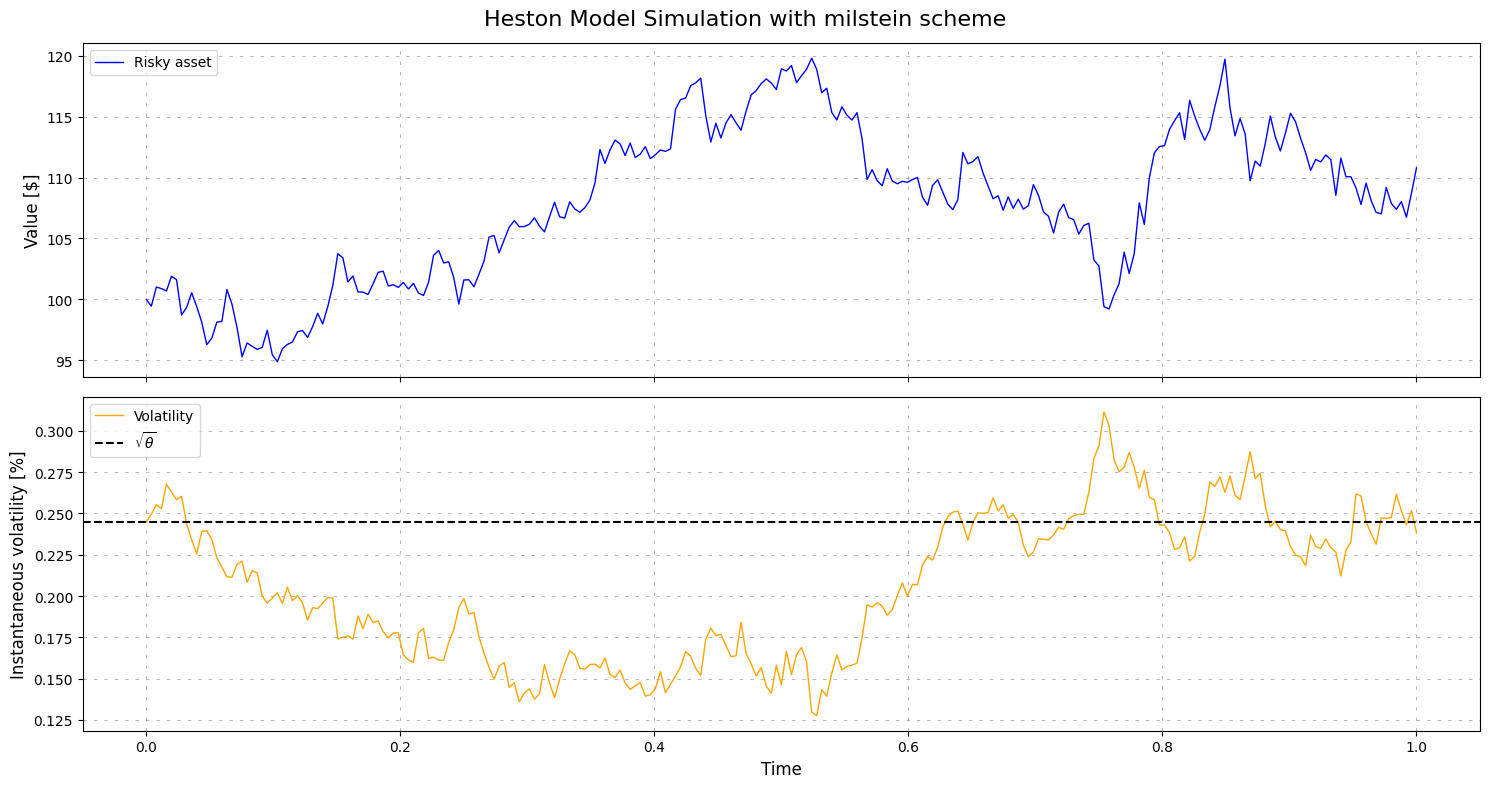

In [9]:
scheme = 'milstein'
S, V = heston.plot_simulation(time_to_maturity=1, scheme="milstein", nbr_points=252)

# Characteristic function

In [10]:
psi1 = heston.characteristic(j=1)
psi2 = heston.characteristic(j=2)

u = np.arange(start=-20, stop=20,step=0.01)

x = np.log(S0)
v = V0
strike = 100
time_to_maturity = 1

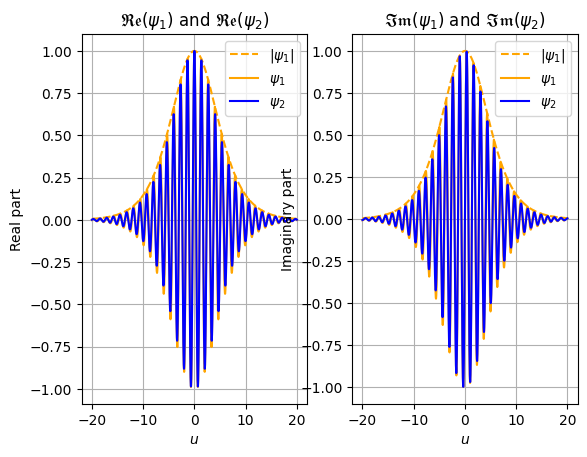

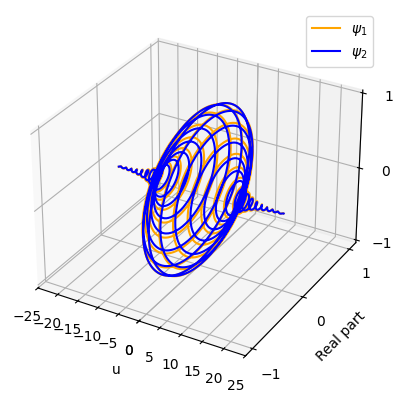

/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:211: RuntimeWarning: divide by zero encountered in divide
  gj = lambda u: (rho * sigma * u * 1j - bj - dj(u)) / (
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:211: RuntimeWarning: invalid value encountered in divide
  gj = lambda u: (rho * sigma * u * 1j - bj - dj(u)) / (
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:217: RuntimeWarning: invalid value encountered in divide
  - 2 * np.log((1 - gj(u) * np.exp(dj(u) * tau)) / (1 - gj(u)))
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:220: RuntimeWarning: invalid value encountered in divide
  lambda tau, u: (bj - rho * sigma * u * 1j + dj(u))


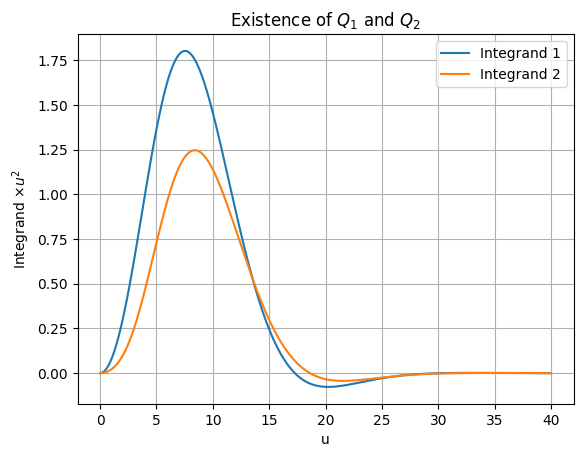

In [11]:
# 2D plot
# Create subplots for real and imaginary parts
plt.figure()

# Plot real part of psi1 and psi2
plt.subplot(1, 2, 1)
plt.title(r'$\mathfrak{Re}(\psi_1)$ and $\mathfrak{Re}(\psi_2)$')
plt.plot(u, np.abs(psi1(x, v, time_to_maturity, u)), label=r'$|\psi_1|$', color='orange', linestyle='--')
plt.plot(u, psi1(x, v, time_to_maturity, u).real, label=r'$\psi_1$', color='orange')
plt.plot(u, psi2(x, v, time_to_maturity, u).real, label=r'$\psi_2$', color='blue')
plt.grid(visible=True)
plt.xlabel(r'$u$')
plt.ylabel('Real part')
plt.legend()

# Plot imaginary part of psi1 and psi2
plt.subplot(1, 2, 2)
plt.title(r'$\mathfrak{Im}(\psi_1)$ and $\mathfrak{Im}(\psi_2)$')
plt.plot(u, np.abs(psi1(x, v, time_to_maturity, u)), label=r'$|\psi_1|$', color='orange', linestyle='--')
plt.plot(u, psi1(x, v, time_to_maturity, u).imag, label=r'$\psi_1$', color='orange')
plt.plot(u, psi2(x, v, time_to_maturity, u).imag, label=r'$\psi_2$', color='blue')
plt.grid(visible=True)
plt.xlabel(r'$u$')
plt.ylabel('Imaginary part')
plt.legend()

#plt.tight_layout()
plt.show() 


# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(u, psi1(x, v, time_to_maturity, u).real, psi1(x, v, time_to_maturity, u).imag, label=r'$\psi_1$', color='orange')
ax.plot(u, psi2(x, v, time_to_maturity, u).real, psi2(x, v, time_to_maturity, u).imag, label=r'$\psi_2$', color='blue')
ax.set_xticks([-5*i for i in range(6)] + [5*i for i in range(6)])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlabel('u')
ax.set_ylabel('Real part')
ax.set_zlabel('Imaginary part')
plt.legend()
plt.show()

## Integration over R_+
psi1 = heston.characteristic(j=1)
integrand1 = lambda u : np.real((np.exp(-u * np.log(strike) * 1j) * psi1(x, v, time_to_maturity, u))/(u*1j)) 
psi2 = heston.characteristic(j=2)
integrand2 = lambda u : np.real((np.exp(-u * np.log(strike) * 1j) * psi2(x, v, time_to_maturity, u))/(u*1j)) 

u = np.arange(start=0, stop=40,step=0.01)

plt.figure()
plt.plot(u, integrand1(u) * u**2, label="Integrand 1")
plt.plot(u, integrand2(u) * u**2, label="Integrand 2")
plt.xlabel(r'u')
plt.ylabel(r'Integrand $\times u^2$')
plt.legend()
plt.grid(visible=True)
plt.title(r'Existence of $Q_1$ and $Q_2$')
plt.show()